# Classification using MNIST Dataset

### How to split already Split dataset

MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.

In [146]:
#Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them
# Fetch dataset from openml by name or dataset id.
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

#Datasets are uniquely identified by either an integer ID or by a combination of name and version
# openML : https://www.openml.org

In [147]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html


In [110]:
# return Databunch dictionary like Object
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:

• A DESCR key describing the dataset 

• A data key containing an array with one row per instance and one column per feature

• A target key containing an array with the labels Let’s

In [111]:
X, y = mnist["data"], mnist["target"] 

In [155]:
X.shape

(70000, 784)

In [149]:
y.shape

(70000,)

In [150]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
pd.DataFrame(X)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [151]:
pd.DataFrame(y)

,0
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function:

In [152]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [121]:
some_digit = X[0] 
some_digit


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [153]:
some_digit_image = some_digit.reshape(28, 28)
some_digit_image


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

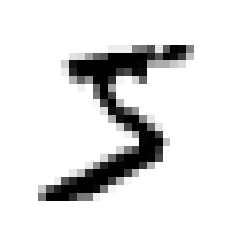

In [154]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest") 
plt.axis("off") 
plt.show()

This looks like a 5, and indeed that’s what the label tells us

In [124]:
y[0]


'5'

Note that the label is a string. We prefer numbers, so let’s cast y to integers:

In [125]:
import numpy as np
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [156]:
y[0]

5

## Test set

You should always create a test set and set it aside before inspecting the data closely. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):

In [157]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [159]:
x.shape

(10,)

In [158]:
x[1:3]


array([1, 2])

In [130]:
x = x.reshape(2, 5)  # now x is 2-dimensional
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [161]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:

X_train, X_test,  = X[60000:],   X[:60000]


In [165]:
pd.DataFrame(X_test)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [139]:
type(X)

numpy.ndarray

> The training set is already shuffled for us, which is good as this guarantees that all cross-validation folds will be similar (you don’t want one fold to be missing some dig‐ its). Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. Shuf‐ fling the dataset ensures that this won’t happen

## Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for this classification task:


In [168]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [172]:
y_train_5 = (y_train == 5) 

y_test_5 = (y_test == 5)


In [171]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [142]:
y_test_5 


array([False, False, False, ..., False,  True, False])

### Let us pick classifier

In [174]:
pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
pd.DataFrame(y_train_5)

,0
0,True
1,False
2,False
3,False
4,False
...,...
59995,False
59996,False
59997,True
59998,False


In [143]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

> The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter

> Remember some_digit is 5

In [176]:
sgd_clf.predict([some_digit])

array([ True])

## Model Evaluation

Evaluating a classifier is often significantly trickier than evaluating a regressor. There are many performance measures available.



#### Measuring Accuracy Using Cross-Validation


> The machine learning methods often fail to model the data because they learn particular features of the training set, that are not present in the test set. So these features are not representative and we are in a situation of Overfitting. It happens when the model fits too much of the training data, but it’s not able to generalize in new samples. There are many ways to address this issue, regularization, selection of the best hyperparameters, and K fold cross validation. We focus on this last  because it has a relevant role to have an impartial performance of the model. Simply splitting the data into training and test set doesn't allow to have a real idea of the model performance. You can say “Wow”, 90% of accuracy on the training set, but after you see 60% of test accuracy. Surely something is wrong. Let us discuss Hold-out vs K-fold

#### Hold out

The classical and old-fashioned approach consists of diving the dataset into 3 fixed subsets: the common choice is to use 60% for training, 20% for validation, and 20% for testing

![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/cross_validation.png)

But, Holdout Method suffers from issues of high variance. This is because it is not certain which data points will end up in the validation set and the result might be entirely different for different sets ( the results can depend on a particular random choice for the pair of (train, validation) sets.)

Also, partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model.



In [177]:
# remember we already have our dataset split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cl = DecisionTreeClassifier(
    max_depth=10000, random_state=0, min_samples_split=4, max_features=11)

cl.fit(X_train, y_train)


y_pred = cl.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8035


In [179]:
cl.score(X_train, y_train)

1.0

> There are many ways to address the issue of Overfitting: regularization, selection of the best hyperparameters, and K fold cross validation

The hold-out method is good to use when you have a very large dataset, you’re on a time crunch, or you are starting to build an initial model in your data science project.

#### K-fold Cross Validation


A solution to the problem of Hold-out a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets 



It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

>K-Fold Cross Validation   (k-fold CV) : As there is never enough data to train your model, removing a part of it for validation poses a problem of underfitting. By reducing the training data, we risk losing important patterns/ trends in data set, which in turn increases error induced by bias. So, what we require is a method that provides ample data for training the model and also leaves ample data for validation. K Fold cross validation does exactly that.

* A model is trained using k-1 of the folds as training data;

* The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).



This procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/k-fold.png)

![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/3-fold.png)

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems where the number of samples is very small.

>  In K Fold Cross Validation, we split the dataset into k folds, k-1 to train the model and the remaining one to evaluate it.


The general procedure is as follows:

    Shuffle the dataset randomly.
    Split the dataset into k groups
    For each unique group:
        Take the group as a hold out or test data set
        Take the remaining groups as a training data set
        Fit a model on the training set and evaluate it on the test set
        Retain the evaluation score and discard the model
    Summarize the skill of the model using the sample of model evaluation scores




More how on how to choose K : https://machinelearningmastery.com/k-fold-cross-validation/

## Go back to our digit-5 example 

Let’s use the cross_val_score() function  to evaluate your SGDClassifier model using K-fold cross-validation, with three folds. Remember that K-fold cross-validation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds 

In [145]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Above 95% accuracy (ratio of correct predictions) on all cross-validation folds?

> Although, the most common metric used to evaluate the performance of a classification predictive model is classification accuracy. Typically, the accuracy of a predictive model is good (above 90% accuracy), therefore it is also very common to summarize the performance of a model in terms of the error rate of the model. But, Accuracy is not a good measure of implance datasets 

<center> Accuracy = Correct Predictions / Total Predictions </center>

Conversely, the error rate can be calculated as the total number of incorrect predictions made on the test set divided by all predictions made on the test set.



<center> Error Rate = Incorrect Predictions / Total Predictions
 </center>

The accuracy and error rate are complements of each other, meaning that we can always calculate one from the other. For example:
<center>  

Accuracy = 1 – Error Rate        , Error Rate = 1 – Accuracy  </center>

So, what is the best classification metrics that report not only accuracy but also, error rate?  **confusion matrix**


> The confusion matrix provides more insight into not only the accuracy of a predictive model, but also which classes are being predicted correctly, which incorrectly, and what type of errors are being made.



### Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. Compute confusion matrix to evaluate the accuracy of a classification.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

 sklearn.metrics.confusion_matrix(y_true, y_pred)

A confusion matrix is a summary of the predictions made by a classification model organized into a table by class. Each row of the table indicates the actual class and each column represents the predicted class. A value in the cell is a count of the number of predictions made for a class that are actually for a given class. The cells on the diagonal represent correct predictions, where a predicted and expected class align.



![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/confusion_matrix.jpg)

> The most straightforward way to evaluate the performance of classifiers is based on the confusion matrix analysis. […] From such a matrix it is possible to extract a number of widely used metrics for measuring the performance of learning systems, such as Error Rate […] and Accuracy …

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch). Instead, you can use the cross_val_predict() function:

In [98]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predic‐tions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training)

Now you are ready to get the confusion matrix using the confusion_matrix() function. Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred)

In [185]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_train_5, y_train_pred)

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:>

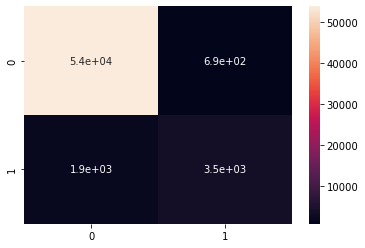

In [187]:
sns.heatmap(cm, annot=True)

In [188]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Each row in this confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images (the negative class): 53892 of them were correctly classified as non-5s (they are called true negatives), while the remaining 687 were wrongly classified as 5s (false positives). 

The second row considers the images of 5s (the positive class): 1891 were wrongly classified as non-5s (false negatives), while the remaining 3530 were correctly classified as 5s (true positives)

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)

In [190]:
# pretend we reached perfection >>> 
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

### Precision and Recall

> The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier and recall, also called sensitivity or true positive rate (the ratio of positive instances that are correctly detected by the classifier)

![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/confu1.png)
![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/confu2.png)
![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/confu3.png)
![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/confu4.png)
![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/confu5.png)
![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/confu6.png)
![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/conf6.png)

Scikit-Learn provides several functions to compute classifier metrics, including preci‐ sion and recall:

In [102]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)


0.8370879772350012

In [104]:
3530 / (687 + 3530)


0.8370879772350012

In [105]:
recall_score(y_train_5, y_train_pred)  # == 4096 / (4096 + 1325)


0.6511713705958311

In [106]:
3530 / (3530+ 1891)


0.6511713705958311

### F-Score

> It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score  is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’. The F1 score is the harmonic mean of precision and recall.

What is the diffrence betweeb Regular mean and Harmonic mean? Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are
high (https://en.wikipedia.org/wiki/Harmonic_mean)

![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/harmonic_mean.png)

![](/Users/shamsuddeenmuhammad/Documents/Vscdoe/Introduction_to_machine_learning_with_Pyhon/images/f1_score.png)

To compute the F1 score, simply call the f1_score() function

In [107]:
from sklearn.metrics import f1_score 
f1_score(y_train_5, y_train_pred) 


0.7325171197343846

The F1 score favors classifiers that have similar precision and recall. This is not always
what you want: in some contexts you mostly care about precision, and in other con‐ texts you really care about recall. For example, if you trained a classifier to detect vid‐ eos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a clas‐ sifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the clas‐ sifier’s video selection). On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

 Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff.

### Precision/Recall Tradeof

Failure of Classification Accuracy for Imbalanced Class Distributions
https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/

![](images/confu2.png)

![](images/confu1.png)